<a href="https://colab.research.google.com/github/pratik-chakraborty10/Machine_Learning/blob/main/FeatureScaling(Standardization).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'social-network-ads:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1394586%2F2311467%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240528%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240528T083110Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D18c7259d65578ccaf2eda85adf92a8e6515930190fa692dd94dab2b84539e124e0ce1247fa8a26d5760fb13310883a1ce510cdd4aa1c19f72eb60bf6dd420562fe0bbc62bf1a7f8771394a07ec52bbd418dcab3833abf78594ae7c48db4c98f7dd7516da2959ab9ff43ef9e7ec9e81040cc7ff0ccc2aa994b72df17e6c747b2630d639014f04026c566a2150013f5e100e967d7e371ea6bee5fd64ca1218617d0e560b326887442b70b9c6a65c27fa5384eacdecc4aaa962239cac4cdfbaef40c957cd604a600dedfb07a17c0aa591285178bb651784014248efb3a1fa9b105d810d1babbe7115b8a1ec723b71095565fd2dc05dbcee9f70d08818767d654a3f'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import pandas as pd
import os

directory_path = '/kaggle/input/social-network-ads'
files = os.listdir(directory_path)
print(files)


csv_file_path = os.path.join(directory_path, 'Social_Network_Ads.csv')

# Read the CSV file
df = pd.read_csv(csv_file_path)

# Display the first few rows of the dataframe to verify
print(df.head())


['Social_Network_Ads.csv']
   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [ ]:
# Dividing the dataset into X and y
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape

((280, 2), (120, 2))

**Standard Scalar******

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

#fit the train data
scalar.fit(X_train)

#transform both the train and test set
X_train_scaled = scalar.transform(X_train)
X_test_scaled  = scalar.transform(X_test)

In [ ]:
scalar.mean_

array([3.75750000e+01, 7.05892857e+04])

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

X_train_scaled
X_test_scaled

,Age,EstimatedSalary
0,0.827784,-1.433827
1,2.105076,0.513775
2,-0.940775,-0.784626
3,1.024290,0.749848
4,-0.842522,-1.256772
...,...,...
115,-1.039028,-1.492845
116,-1.137281,-1.581373
117,-0.056496,0.661320
118,0.434771,-0.489535


In [ ]:
np.round(X_train_scaled.describe(),1) # after scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


In [ ]:
np.round(X_train.describe(),1) #before scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70589.3
std,10.2,33948.5
min,18.0,15000.0
25%,30.0,44000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


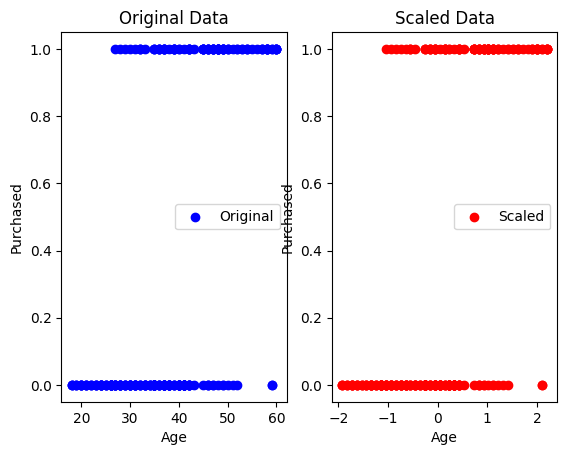

In [ ]:
# Original data plot
plt.subplot(1, 2, 1)
plt.scatter(X_train['Age'], y_train, color='blue', label='Original')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Original Data')
plt.legend()

# Scaled data plot
plt.subplot(1, 2, 2)
plt.scatter(X_train_scaled['Age'], y_train, color='red', label='Scaled')
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Scaled Data')
plt.legend()

plt.show()


**Why Scaling is important???**

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [ ]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Actual: ",accuracy_score(y_test,y_pred))
print("Scaled: ",accuracy_score(y_test,y_pred_scaled))

# after scaling the accuracy score is high.

Actual:  0.6083333333333333
Scaled:  0.85
